In [1]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 1.4 MB/s eta 0:00:00


In [1]:
import os
import torch
import supervision as sv

In [2]:
home = os.getcwd()
print(home)

/content


In [3]:
%cd {home}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {home}/GroundingDINO
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 433 (delta 152), reused 132 (delta 128), pack-reused 231
Receiving objects: 100% (433/433), 12.86 MiB | 31.35 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.7 MB/s eta 0:00:00


In [4]:
config_path = os.path.join(home, 'GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py')
print(config_path, os.path.isfile(config_path))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py True


In [5]:
%cd {home}
!mkdir {home}/weights
%cd {home}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [6]:
weights_name = "groundingdino_swint_ogc.pth"
weights_path = os.path.join(home, "weights", weights_name)
print(weights_path, "; exist:", os.path.isfile(weights_path))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [7]:
%cd {home}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = load_model(config_path, weights_path)
model.to(DEVICE)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

GroundingDINO(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x DeformableTransformerEncoderLayer(
          (self_attn): MultiScaleDeformableAttention(
            (sampling_offsets): Linear(in_features=256, out_features=256, bias=True)
            (attention_weights): Linear(in_features=256, out_features=128, bias=True)
            (value_proj): Linear(in_features=256, out_features=256, bias=True)
            (output_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (dropout1): Dropout(p=0.0, inplace=False)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout2): Dropout(p=0.0, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (dropout3): Dropout(p=0.0, inplace=False)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_aff

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


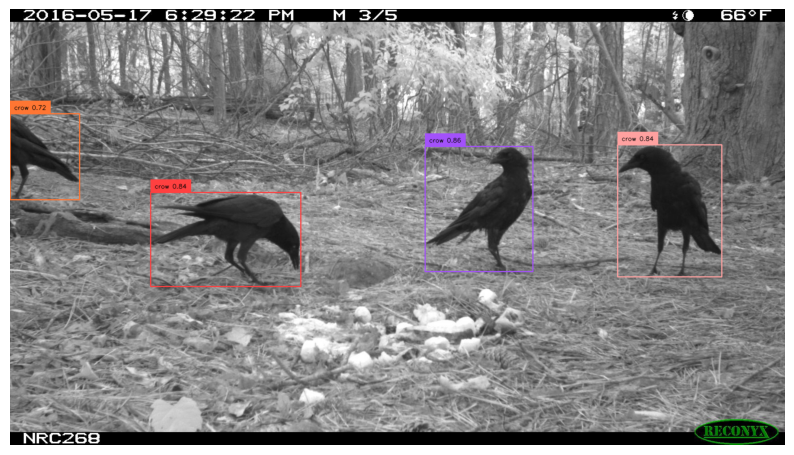

In [9]:
image_path = '/content/8701.jpg'

text_prompt = "Crow"
box_threshold = 0.35
text_threshold = 0.25

image_source, image = load_image(image_path)

boxes, logits, phrases = predict(
    model = model,
    image = image,
    caption = text_prompt,
    box_threshold = box_threshold,
    text_threshold = text_threshold
)

annotated_frame = annotate(image_source = image_source, boxes = boxes, logits = logits, phrases = phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (10, 10))